In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data.head()

,id,age,job,civil,edu,credit,hloan,ploan,ctype,month,...,ccontact,lcdays,pcontact,presult,employment,cprice,cconf,euri3,employees,outcome
0,127087,32,technician,married,university,no,yes,no,cellular,jul,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,104222,27,services,single,9K,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,126970,57,services,divorced,unknown,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
3,123366,42,entrepreneur,married,university,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,100832,49,technician,married,apprenticeship,no,no,yes,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28831 non-null  int64  
 1   age         28831 non-null  int64  
 2   job         28831 non-null  object 
 3   civil       28831 non-null  object 
 4   edu         28831 non-null  object 
 5   credit      28831 non-null  object 
 6   hloan       28831 non-null  object 
 7   ploan       28831 non-null  object 
 8   ctype       28831 non-null  object 
 9   month       28831 non-null  object 
 10  day         28831 non-null  object 
 11  ccontact    28831 non-null  int64  
 12  lcdays      28831 non-null  int64  
 13  pcontact    28831 non-null  int64  
 14  presult     28831 non-null  object 
 15  employment  28831 non-null  float64
 16  cprice      28831 non-null  float64
 17  cconf       28831 non-null  float64
 18  euri3       28831 non-null  float64
 19  employees   28831 non-nul

In [ ]:
data.isnull().sum()

id            0
age           0
job           0
civil         0
edu           0
credit        0
hloan         0
ploan         0
ctype         0
month         0
day           0
ccontact      0
lcdays        0
pcontact      0
presult       0
employment    0
cprice        0
cconf         0
euri3         0
employees     0
outcome       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

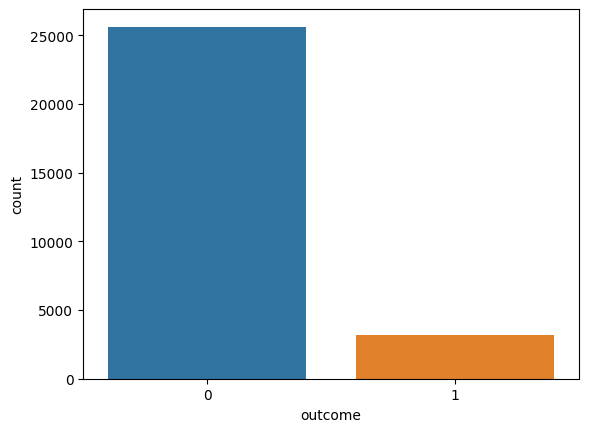

In [ ]:
sns.countplot(x='outcome', data=data)
plt.show()

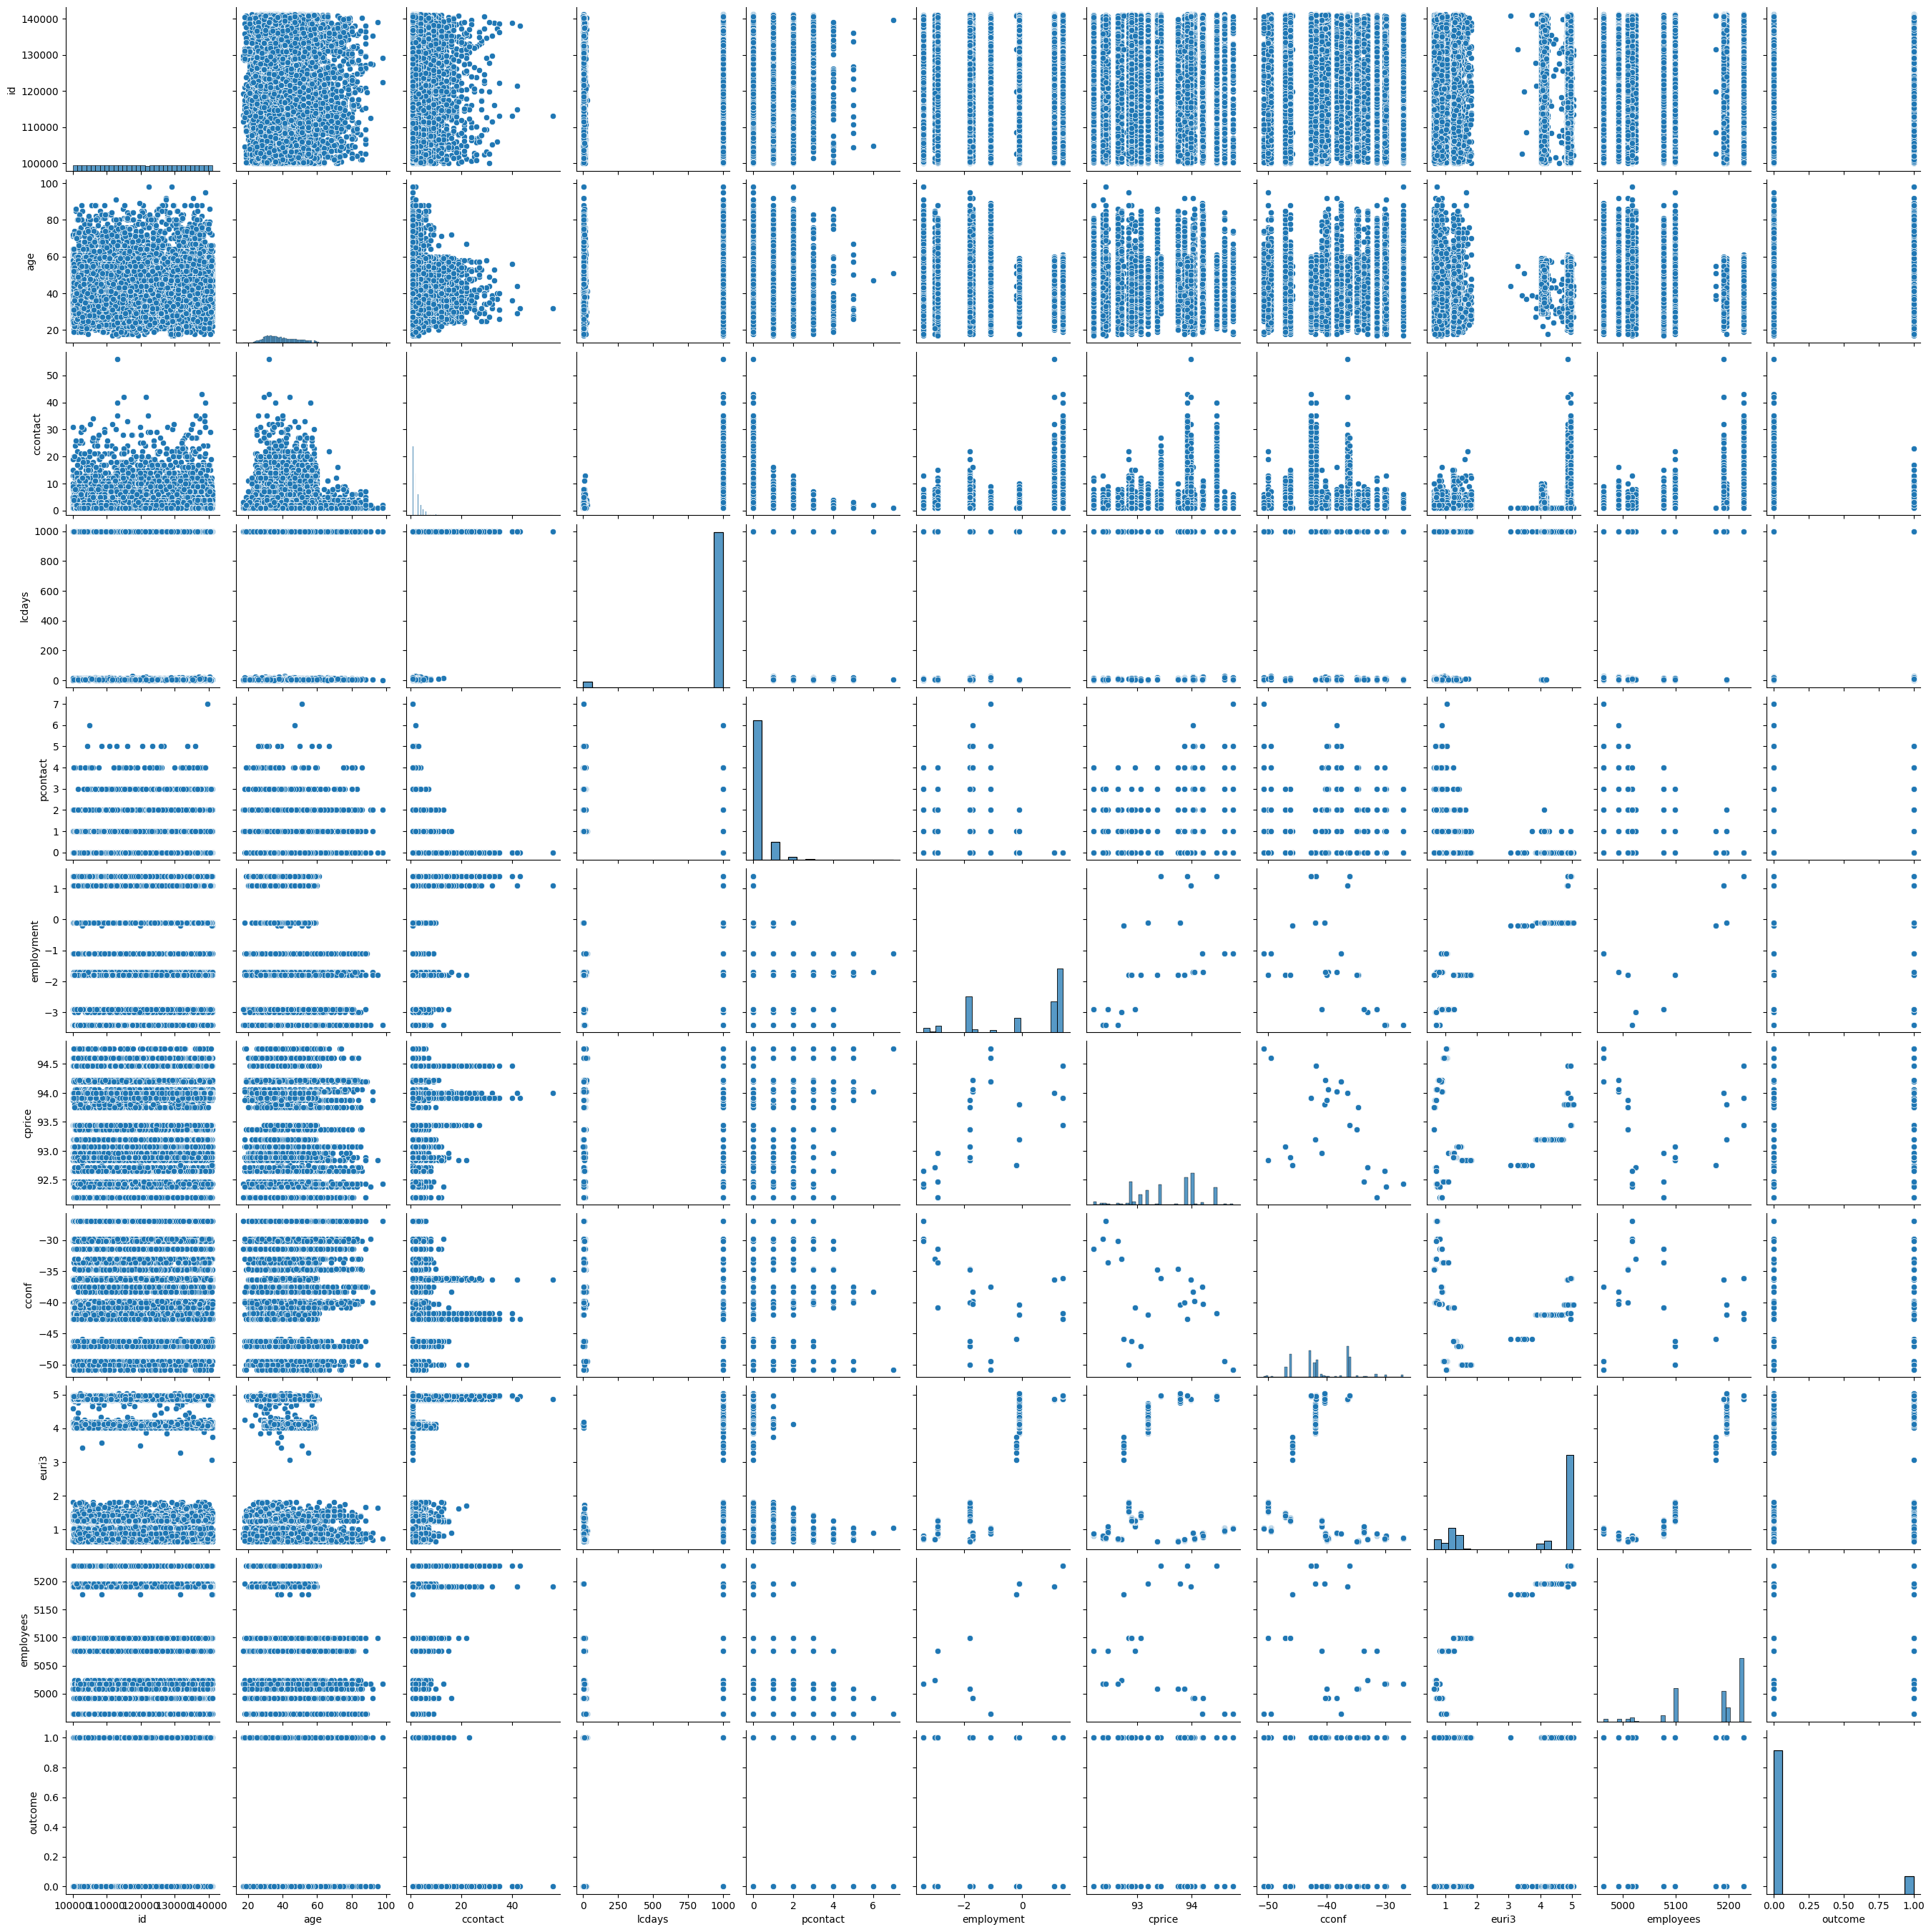

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['job', 'civil', 'edu', 'credit', 'hloan', 'ploan', 'ctype', 'month', 'day', 'presult']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(data[categorical_columns])
encoded_categorical = pd.DataFrame(enc.transform(data[categorical_columns]).toarray(),
                                    columns=enc.get_feature_names_out(categorical_columns))
data = pd.concat([data, encoded_categorical], axis=1)

# drop original
data.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
data.head()

,id,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,presult_failure,presult_nonexistent,presult_success
0,127087,32,7,999,0,1.4,93.918,-42.7,4.968,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,104222,27,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,126970,57,4,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,123366,42,1,999,0,1.1,93.994,-36.4,4.858,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,100832,49,1,999,0,1.4,94.465,-41.8,4.958,5228.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = data.drop('outcome', axis=1)
y = data['outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# rfc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8930119646263222

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4973  179]
 [ 438  177]]


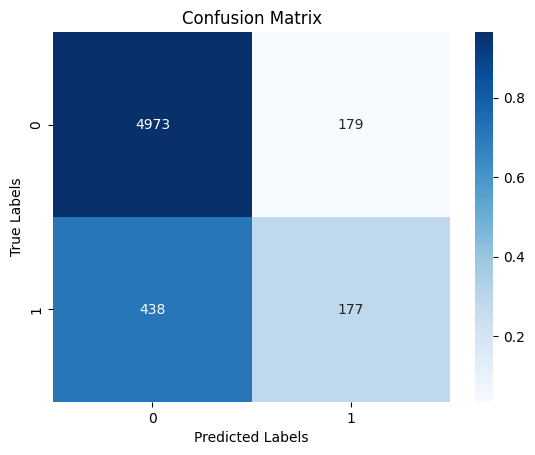

In [ ]:
# column names
class_names = np.unique(y_test)

# normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# create heatmap
sns.heatmap(cm_norm, annot=cm, fmt='g', cmap='plasma', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

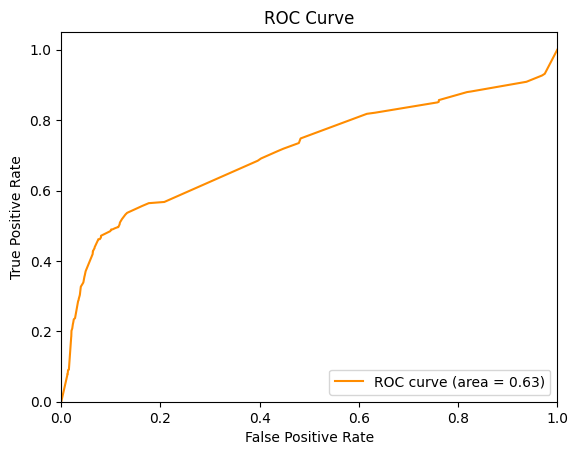

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()